# Google Play Hypothesis Testing
by Giancarlo Marchesi

The objective of this project is to highlight some specific characteristics of the most popular apps by rating at Google Play Store. 

I aim to answer the following questions:

- Are paid apps better rated than free apps?
- Are highly popular apps, in terms of downloads, better rated than less popular apps?
- Is the highest rated category statistically better than the rest?

For this I will use hypothesis testing using a two-sample unpaired T-test.

The data was obtained from Kaggle https://www.kaggle.com/datasets/lava18/google-play-store-apps
and cleaned in the notebook `DataCleaning_GooglePlay`. It is a sample of ratings from the Google Play Store between 2016 and 2018.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm #used for plotting

In [2]:
df=pd.read_csv('google_play_clean.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price,Popularity,Cat_Reviews,Cat_Content
0,Weather Live,WEATHER,4.5,76593.0,Varies with device,"500,000+",Paid,Everyone,WEATHER,"November 21, 2017",Varies with device,Varies with device,5.99,Medium,Stable,Everyone
1,Weather by WeatherBug: Forecast,WEATHER,4.5,981995.0,Varies with device,"10,000,000+",Free,Everyone,WEATHER,"June 7, 2018",Varies with device,Varies with device,0.00,Large,Stable,Everyone
2,SMHI Weather,WEATHER,3.5,11297.0,Varies with device,"1,000,000+",Free,Everyone,WEATHER,"June 26, 2018",Varies with device,Varies with device,0.00,Large,Stable,Everyone
3,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,Varies with device,"1,000,000+",Free,Everyone,WEATHER,"June 12, 2018",Varies with device,Varies with device,0.00,Large,Stable,Everyone
4,Weather From DMI/YR,WEATHER,4.3,2143.0,Varies with device,"100,000+",Free,Everyone,WEATHER,"July 31, 2018",Varies with device,Varies with device,0.00,Medium,Medium,Everyone


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8895 entries, 0 to 8894
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8895 non-null   object 
 1   Category        8895 non-null   object 
 2   Rating          8895 non-null   float64
 3   Reviews         8894 non-null   float64
 4   Size            8895 non-null   object 
 5   Installs        8895 non-null   object 
 6   Type            8895 non-null   object 
 7   Content Rating  8895 non-null   object 
 8   Genres          8894 non-null   object 
 9   Last Updated    8440 non-null   object 
 10  Current Ver     8428 non-null   object 
 11  Android Ver     8396 non-null   object 
 12  Price           8895 non-null   float64
 13  Popularity      8895 non-null   object 
 14  Cat_Reviews     8895 non-null   object 
 15  Cat_Content     8895 non-null   object 
dtypes: float64(3), object(13)
memory usage: 1.1+ MB


The df holds information for 8895 different apps (this was tested in DataCleaning_GooglePlay)

There are only three numerical variables: `Rating`, `Reviews` and `Price`

In [56]:
df.describe()

,Rating,Reviews,Price
count,8895.000000,8.894000e+03,8895.000000
mean,4.187589,4.726703e+05,0.963278
std,0.522856,2.904734e+06,16.186649
min,1.000000,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,0.000000
50%,4.300000,4.708000e+03,0.000000
75%,4.500000,7.119725e+04,0.000000
max,5.000000,7.815831e+07,400.000000


There are two other important categorical variables for the analysis. 

In [58]:
df['Type'].value_counts()

Free    8281
Paid     614
Name: Type, dtype: int64

The feature `Type` is either Paid or Free. By definition, "Free" has a price of zero. Any type of marginal analysis of the effect of price on ratings could be done with a linear regression. Yet, a hypothesis test can tell if the average rating between Free and Paid is differente. A priori, the hypothesis would be that this is so. The reasoning would be that paid apps are, on average, more polished since part of their business model is related to revenue from installations. 

In [57]:
df['Popularity'].value_counts()

Large      3301
Small      3216
Medium     1627
Unicorn     751
Name: Popularity, dtype: int64

`Popularity` has grouped `Installs` into four groups. The groups with most installs are "Large" and "Unicorn", and the ones with less installs are "Small" and "Medium". The hypothesis here would be that first group has higher ratings, that's why they get more installs.  

## Are paid apps better rated than free apps?

The mean difference, or difference in means, measures the absolute difference between the mean value in two different groups. We want to check if the average rating for Paid apps is higher than that of Free apps. 

We can test this hypothesis by using a T-test to check the differences in means for the ratings of both groups.  

Hypothesis Test:

<center> $H_0$: $\mu_{Paid} = \mu_{Free} $ $\;\; vs \;\;$  $H_1$: $\mu_{Paid} \neq \mu_{Free} $ </center>

The null hypothesis states that there are no differences in the average rating.  

In [6]:
## Creating the Paid array
Paid=df[df['Type']=='Paid']['Rating']

In [7]:
Paid

0       4.5
29      4.5
36      4.8
53      3.8
54      4.5
       ... 
8714    4.1
8761    4.6
8848    4.7
8851    4.7
8856    4.8
Name: Rating, Length: 614, dtype: float64

In [14]:
## Only 614 observations
Paid.count()

614

In [15]:
## With a mean of 4.26
Paid.mean()

4.2610749185667744

In [8]:
## Creating the Free array
Free=df[df['Type']=='Free']['Rating']

In [59]:
## 8281 observations 
Free.count()

8281

In [16]:
## With a mean of 4.18
Free.mean()

4.182139838183784

In [17]:
# we can use the built in function: ttest_ind
two_sample_test = stats.ttest_ind(Paid, Free) 

print(two_sample_test)

Ttest_indResult(statistic=3.611887813009232, pvalue=0.00030565119974159126)


The results indicate that the pvalue is below the 0.05 threshold. Therefore we can reject the null hypothesis that the means between Paid and Free are differente. As we calculated before, the mean for Paid is 0.08 higher. But lets take a look at the assumptions of two sample unpaired t-Test

**Assumptions of the Two-Sample Independent (Unpaired) t-Test**
- Data points in each group are independent of each other: they are. The rating of one app should not affect anothers. 
- The means of both samples come from a normal sampling distribution:
    - Either the samples themselves are normally distributed (the populations are normally distributed)
            As we can see in the histograms below, they are not normally distributed, but left skewed. 
    - Or the samples are large enough that the CLT guarantees the sampling distributions are approximately normal
            This is a point of contention in the case of Paid apps, which has only 7.5% of the amount of observations in          the Free group. The test is unbalanced. 
- Data in group A are independent from data in group B: They can't be paid and free at the same time.  
- Variances of both populations are identical. 
             This cannot be tested with the information at hand. 

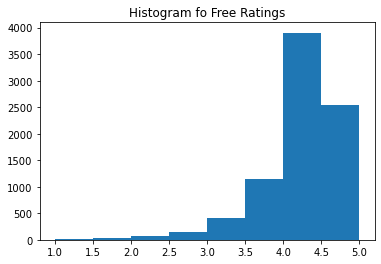

In [60]:
plt.figure()
plt.hist(Free, bins=8)
plt.title('Histogram fo Free Ratings')
plt.show;

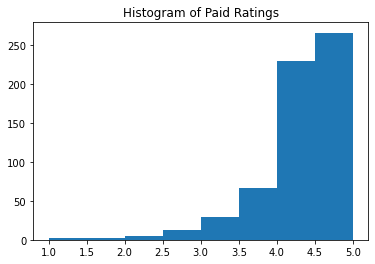

In [63]:
plt.figure()
plt.hist(Paid, bins=8)
plt.title('Histogram of Paid Ratings')
plt.show;

## Are highly popular apps, in terms of `installs`, better rated than less popular apps?

**Hypothesis Test:**

<center> $H_0$: $\mu_{Highpop} = \mu_{Lowpop} $ $\;\; vs \;\;$  $H_1$: $\mu_{Highpop} \neq \mu_{Lowpop} $ </center>

The null hypothesis states that there are no differences in the average rating between higly popular an less popular apps 

In [77]:
## Create a highly popular group
High_pop=df[(df['Popularity']=='Large') | (df['Popularity']=='Unicorn')]['Rating']

In [68]:
## 4053 observations
High_pop.count()

4052

In [70]:
## with a mean rating of 4.27 
High_pop.mean()

4.277171767028626

In [72]:
## Creat a lower popularity group
Low_pop=df[(df['Popularity']=='Small') | (df['Popularity']=='Medium')]['Rating']

In [73]:
Low_pop.count()

4843

In [74]:
Low_pop.mean()

4.112636795374768

In [75]:
# we can use the built in function: ttest_ind
two_sample_test = stats.ttest_ind(High_pop, Low_pop) 

print(two_sample_test)

Ttest_indResult(statistic=14.964803116151753, pvalue=5.051656017485939e-50)


In this case, the p-value is very close to zero and both classes are more balanced and closer to what the Central Limit Theorem would suggest. The confidence in these results is higher than in the last case. We reject the null hypotesis that the difference in ratings between the most popular and less popular apps is zero. Intuitively, this makes sense, as the most popular apps would tend to be better rated by the users. 

## Is the highest rated category statistically better than the rest?

In [78]:
## Finding the number of categories
df['Category'].nunique()

33

In [40]:
## Finding the means for all categories
df.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
COMICS                 4.155172
COMMUNICATION          4.151466
DATING                 3.972671
EDUCATION              4.375969
ENTERTAINMENT          4.136036
EVENTS                 4.435556
FAMILY                 4.191153
FINANCE                4.127445
FOOD_AND_DRINK         4.164151
GAME                   4.281285
HEALTH_AND_FITNESS     4.261450
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.096066
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.182450
NEWS_AND_MAGAZINES     4.128505
PARENTING              4.300000
PERSONALIZATION        4.333871
PHOTOGRAPHY            4.175410
PRODUCTIVITY           4.201796
SHOPPING               4.251485
SOCIAL                 4.254918
SPORTS                 4.225175
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.094146

Events has the highest with 4.43

In [44]:
## Creating the Events group
Events=df[df['Category']=='EVENTS']['Rating']

In [42]:
## It only has 45 observations 
Events.count()

45

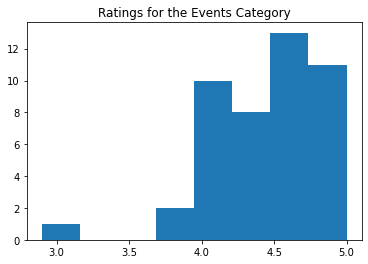

In [79]:
plt.figure()
plt.hist(Events, bins=8)
plt.title('Ratings for the Events Category')
plt.show;

In [45]:
## Creating the not events group
Not_events=df[df['Category']!='EVENTS']['Rating']

In [47]:
## There are 8850 observations in this group. This is very unbalanced. 
Not_events.count()

8850

In [49]:
## The mean for non events is nearly the same as the whole sample
Not_events.mean()

4.186327683615807

**Hypothesis Test:**

<center> $H_0$: $\mu_{Events} = \mu_{Notevents} $ $\;\; vs \;\;$  $H_1$: $\mu_{Events} \neq \mu_{Notevents} $ </center>

The null hypothesis states that there are no differences in the average rating betweeen apps in the Events category and the rest of the categories.  

In [80]:
# we can use the built in function: ttest_ind
two_sample_test = stats.ttest_ind(Events, Not_events) 

print(two_sample_test)

Ttest_indResult(statistic=3.1911213257116016, pvalue=0.0014221437345704156)


Although the p-value is close to zero and the null hypothesis should be rejected, the small number of observations in the Events category challenges the validity of the assumptions for the T-test. 

## Conclusion

- Of the three proposed questions, we have more confidence that highly popular apps in terms of installs are beter rated than less popular apps. The T-test point to statistically significant differences in the rartings for the case of paid vs free apps and the best category, Events, versus the rest. Yet the groups are unbalanced. The number of observations in the paid and events groups challenge the assumption that the CLT guarantees the sampling distributions are approximately normal. Hence, more observations would be needed in these two groups to have greater confidence about these results.   